There are many deep-learning libraries in Julia. One of the most used one is Flux.jl  
*"Relax! Flux is the ML library that doesn't make you tensor https://fluxml.ai/ "*

In [1]:
using Pkg; Pkg.activate(".")
using Flux
model = Chain(
  Dense(10, 5, σ),
  Dense(5, 2),
  softmax)

model(rand(10))

  Activating project at `~/repos/juliacourse2022/lecture6_optimization_learning`


2-element Vector{Float64}:
 0.40140582474401393
 0.5985941752559861

In [2]:
using Flux: Params

W = rand(2, 5)
b = rand(2)

predict(x) = W*x .+ b
loss(x, y) = sum((predict(x) .- y).^2)

x, y = rand(5), rand(2) # Dummy data
l = loss(x, y) # ~ 3

θ = Params([W, b])
grads = Flux.gradient(() -> loss(x, y), θ)

Grads(...)

In [3]:
@show loss(x, y)
η = 0.01 # Learning Rate
for p in (W, b)
  p .-= η * grads[p]
end
@show loss(x, y)

loss(x, y) = 2.6457512817386806
loss(x, y) = 2.329352734249398


2.329352734249398

Running this will alter the parameters W and b and our loss should go down. Flux provides a more general way to do optimiser updates like this.

In [4]:
using Flux.Optimise: update!
@show loss(x, y)
opt = Descent(0.01) # Gradient descent with learning rate 0.1

for p in (W, b)
  update!(opt, p, grads[p])
end
@show loss(x, y)

loss(x, y) = 2.329352734249398
loss(x, y) = 2.0330963722179574


2.0330963722179574

# Training
To actually train a model we need three things:

- A objective function, that evaluates how well a model is doing given some input data.
- A collection of data points that will be provided to the objective function.
- An optimiser that will update the model parameters appropriately.
With these we can call Flux.train!:  
`Flux.train!(objective, params, data, opt)`

In [5]:
m = Chain(
  Dense(784, 32, σ),
  Dense(32, 10), softmax)

loss(x, y) = Flux.mse(m(x), y)
ps = Flux.params(m)

# later
Flux.train!(loss, ps, data, opt) # This will fail, we have not defined data yet

LoadError: UndefVarError: data not defined

# Datasets
The data argument provides a collection of data to train with (usually a set of inputs `x` and target outputs `y`). For example, here's a dummy data set with only one data point:

In [6]:
x = rand(784)
y = rand(10)
dataset = [(x, y)]

1-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.022174533719673928, 0.6081175010452862, 0.44543406126005936, 0.9224401666332326, 0.13372743294040557, 0.4859574018044879, 0.0033763047754317155, 0.15780414869433912, 0.9960646043994764, 0.18440703035383788  …  0.48762336356021097, 0.18599517019959422, 0.4770449542577091, 0.5406803823920807, 0.026895994794752576, 0.48277590914756296, 0.2671105456103523, 0.8853077667853836, 0.13093366255780847, 0.37399609880641205], [0.6982801859679514, 0.6746978326862396, 0.6056283894693755, 0.4478673207163876, 0.29571096423205956, 0.6579648495421349, 0.81525566926836, 0.5284532095865069, 0.34066339139794666, 0.46878965878745027])

Flux.train! will call `loss(x, y)`, calculate gradients, update the weights and then move on to the next data point if there is one. We can train the model on the same data three times:

In [7]:
dataset = [(x, y), (x, y), (x, y)]
# Or equivalently
dataset = Iterators.repeated((x, y), 3)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Vector{Float64}, Vector{Float64}}}}(Base.Iterators.Repeated{Tuple{Vector{Float64}, Vector{Float64}}}(([0.022174533719673928, 0.6081175010452862, 0.44543406126005936, 0.9224401666332326, 0.13372743294040557, 0.4859574018044879, 0.0033763047754317155, 0.15780414869433912, 0.9960646043994764, 0.18440703035383788  …  0.48762336356021097, 0.18599517019959422, 0.4770449542577091, 0.5406803823920807, 0.026895994794752576, 0.48277590914756296, 0.2671105456103523, 0.8853077667853836, 0.13093366255780847, 0.37399609880641205], [0.6982801859679514, 0.6746978326862396, 0.6056283894693755, 0.4478673207163876, 0.29571096423205956, 0.6579648495421349, 0.81525566926836, 0.5284532095865069, 0.34066339139794666, 0.46878965878745027])), 3)

It's common to load the xs and ys separately. In this case you can use zip:

In [8]:
xs = [rand(784), rand(784), rand(784)]
ys = [rand( 10), rand( 10), rand( 10)]
dataset = zip(xs, ys)

zip([[0.3817712385496791, 0.22391685102008607, 0.07322984040890079, 0.8702608660790081, 0.7198344663680508, 0.8573270226522685, 0.46449128633006354, 0.12804213499188855, 0.0021453715440223897, 0.2240220140341337  …  0.7164673980121415, 0.8040001464785255, 0.6620557918395318, 0.10769434831230607, 0.9041251821935389, 0.944793645257832, 0.3104897729346032, 0.4848163573907779, 0.80886082130258, 0.4902490736484092], [0.4972575424021325, 0.5397906121069281, 0.9271706426525268, 0.9438520383827717, 0.7085771625438259, 0.025964549285186767, 0.258255915123598, 0.37637243197414494, 0.737429529588978, 0.6110805370714244  …  0.8132439242326028, 0.10222973997635398, 0.830593854483841, 0.5657331394630991, 0.992106969964327, 0.7956512765585203, 0.6887217641268023, 0.7524985202329856, 0.9376525477013996, 0.3009080477309527], [0.9384570886846393, 0.800194734242322, 0.9333157758404277, 0.12719969652131458, 0.23032233011609682, 0.8617140315447634, 0.4392313078707726, 0.9731663913376184, 0.4281091056375634

Note that, by default, train! only loops over the data once (a single "epoch"). A convenient way to run multiple epochs from the REPL is provided by `@epochs`.

# Example -- Time series clustering 
Say we have a bunch of $n$ time series of length $T$ collected in matrix $A \in \mathbb{R^{T\times m}}$

Can we decompose $A$ as a combination of "basis time series"?

This is exactly what SVD does $A = U(SV^T)$. If we keep only the $k$ largest singular value/vector pairs, we have a low-rank approximation (the number of basis time series is lower than the number of measured time series.

What if we want a sparse decomposition?
$$A = WH$$ where $h$ is sparse.

What if we want each time series $a_i = W h_i$ to be not only sparse in $h_i$, but that $h_i$ lives on the probability simplex
$$h_i \geq 0, \quad \sum h_i = 1$$
This would allow us to say that $a_i$ is 10% of one base vector and 90% of another one, etc.

Dirichlet process prior on $h_i \sim Dirichlet(\alpha)$

One can solve this problem using Bayesian non-parametrics, but it takes forever (I have tried)

One can also just maximize
$$|| A - WH|| - (\alpha -1)\sum H$$

To make sure $h_i$ stays on the probability simplex, we optimize over $\bar h_i$ and calculate $h_i = softmax(\bar h_i)$

We start by creating some data

In [9]:
m,n,k = 20,10,3

W = randn(m,k)
H = softmax(5randn(k,n))
A = W*H
H

3×10 Matrix{Float64}:
 0.0005412   0.16643    0.061858   …  5.47549e-7  0.00808963  2.58087e-5
 2.23054e-5  0.0096586  0.0148998     0.00088588  0.0487759   0.939564
 0.999436    0.823911   0.923242      0.999114    0.943134    0.0604101

We can try the SVD method first

In [10]:
function rank_k_svd(A,k)
    s = svd(A)
    Wsvd, Hsvd = s.U[:,1:k], s.Vt[1:k,:]
    Asvd = Wsvd*Diagonal(s.S[1:k])*Hsvd
    Wsvd,Hsvd,Asvd
end

Wsvd,Hsvd,Asvd = rank_k_svd(A,k)
@assert norm(A-Asvd)/norm(A) < 1e-10
Hsvd

3×10 Matrix{Float64}:
 -0.396479   -0.324332     -0.364183   …  -0.369164      0.0706418
  0.0150157  -0.108346     -0.0326479      0.000582108  -0.156126
 -0.0193637   0.000342064  -0.0236729     -0.0679661    -0.982022

The resulting $H$ is dense and hard to interpret

We now set up and solve the stated optimization problem using Flux 

In [11]:
α = 0.2
Wh,Hh = randn(m,k+1), randn(k+1,n)
p = Params((Wh,Hh))
dir(H,α) = (α-1)*sum(log, H)
function cost()
    H = softmax(Hh)
    norm(A-Wh*H) - dir(H,α) # Negative likelihood
end

cost (generic function with 1 method)

We then create an optimizer and run gradient-based training for a number of iterations

In [12]:
opt = ADAM()

Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [26]:
@time for i = 1:2000
    gs = Flux.gradient(cost, p)
    Flux.Optimise.update!(opt, p, gs)
end
Ah = (Wh*softmax(Hh))
@show norm(A-Asvd)/norm(A)
@show norm(A-Ah)/norm(A)

  0.031696 seconds (138.00 k allocations: 28.931 MiB)
norm(A - Asvd) / norm(A) = 5.867918123672767e-16
norm(A - Ah) / norm(A) = 0.33872809257545705


0.33872809257545705

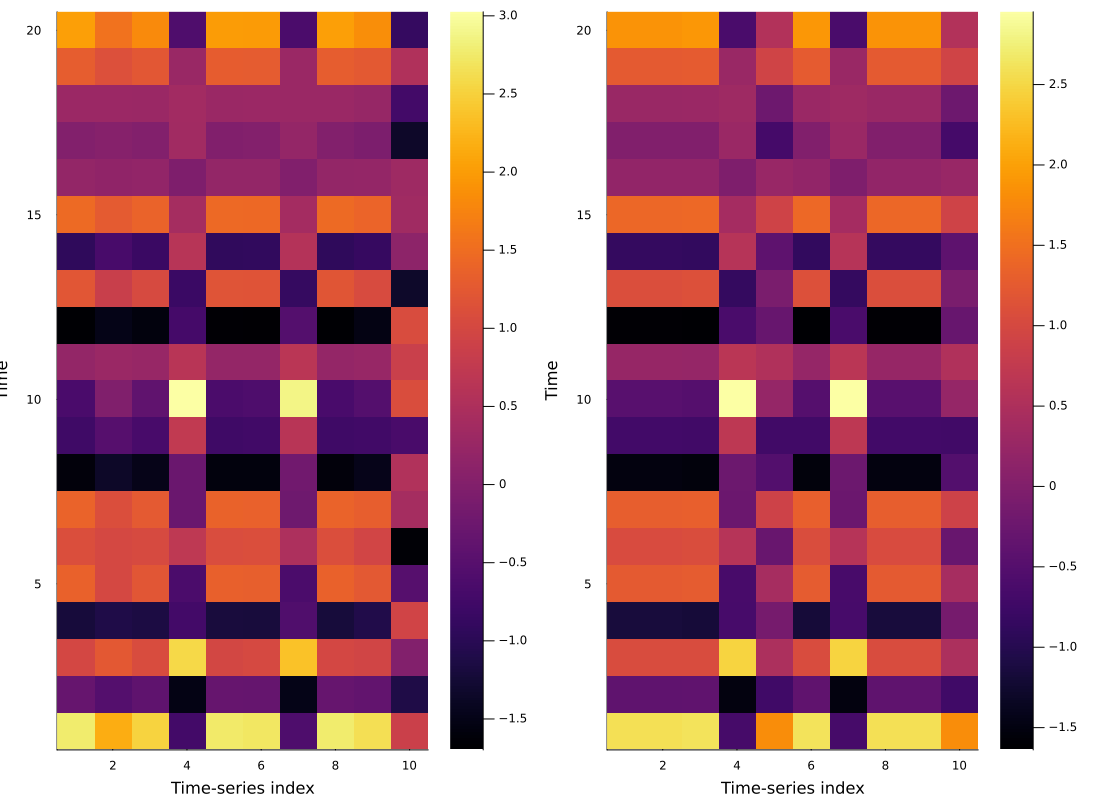

In [27]:
heatmap(A, layout=2, ylabel="Time", xlabel="Time-series index"); heatmap!(Ah, subplot=2)

How well does our decomposition approximate the original time series?

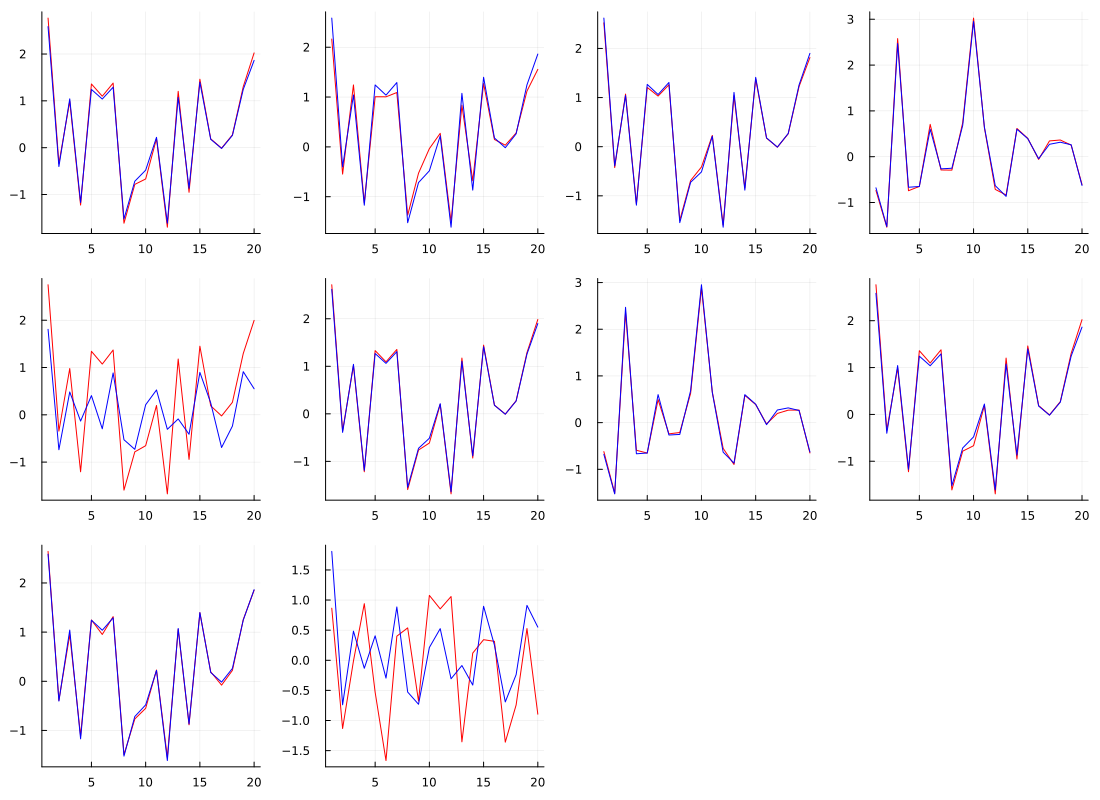

In [28]:
plot(A, c=:red, layout=10); plot!(Ah, c=:blue, legend=false)

Just for fun, let's look at the basis functions

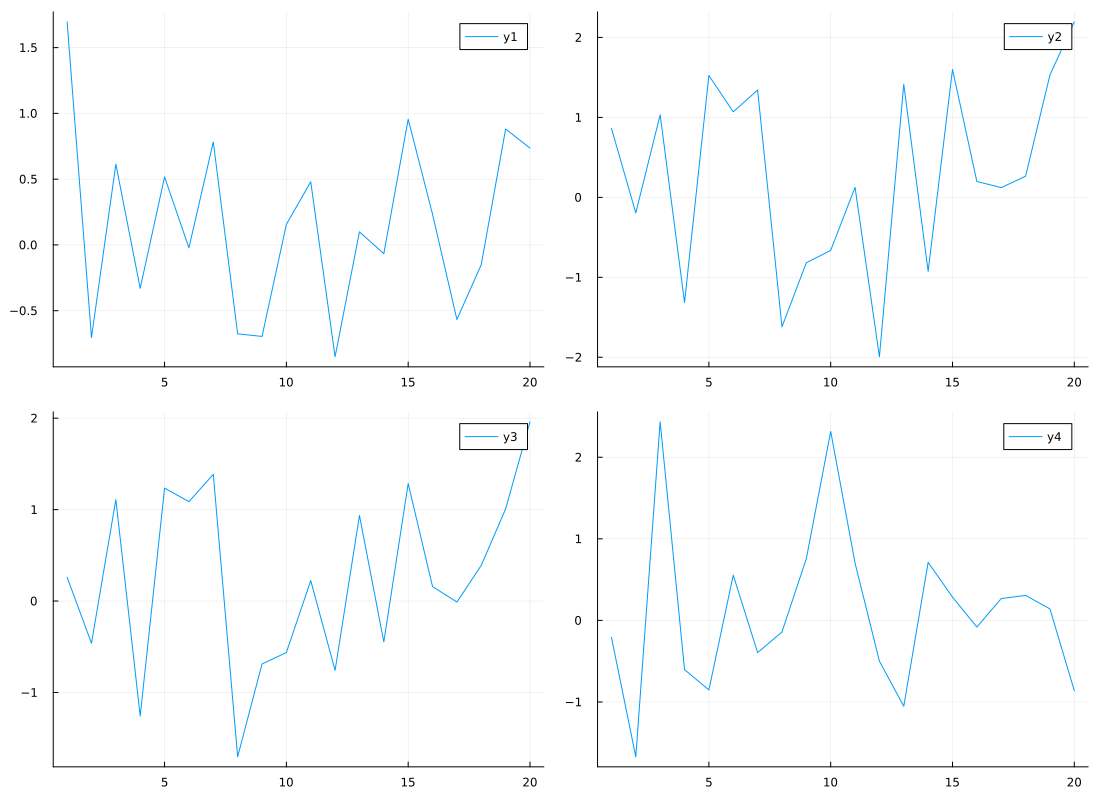

In [16]:
plot(Wh, layout=size(Wh,2))

Now, let's see if the resulting $H$ is sparse

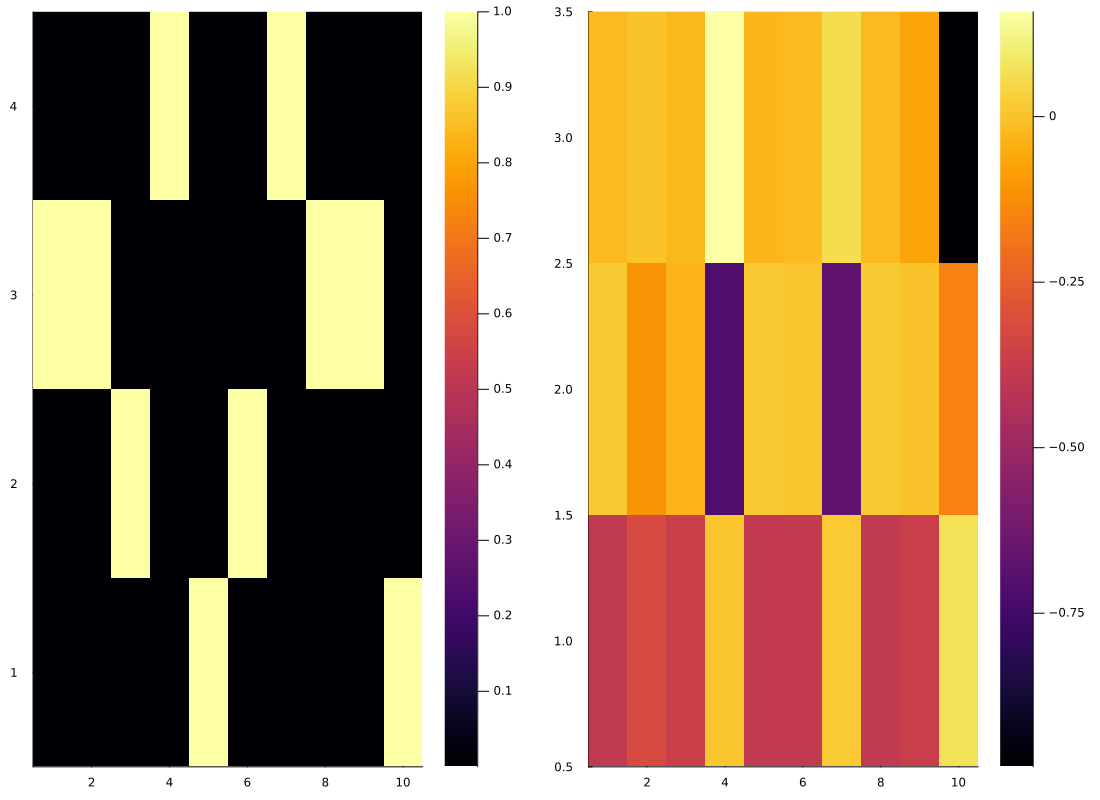

In [29]:
plot(heatmap(softmax(Hh)), heatmap(Hsvd))

To see if we have used too many basis functions, we see if there are strong correlations between them.

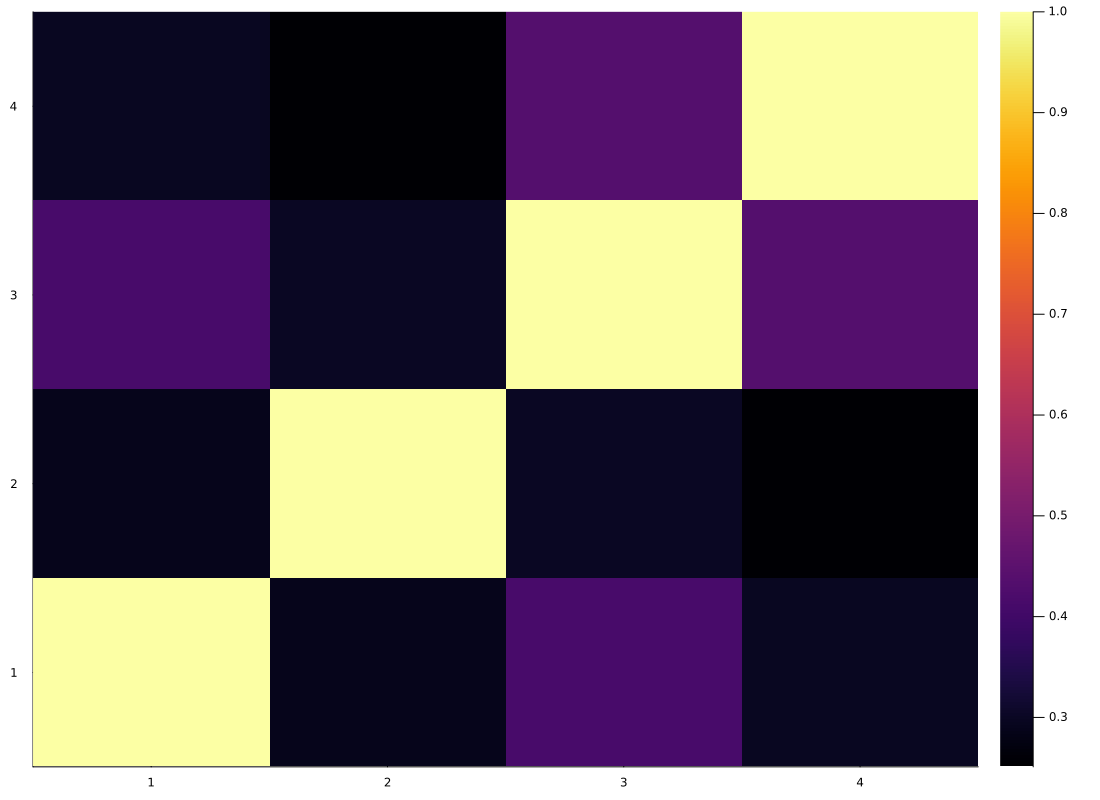

In [30]:
heatmap(abs.(cor(Hh')))